## FOOD PRODUCTION ANALYSIS

### Business Understanding

Goal:To analyze the environmental impact of different foods by evaluating their land use, water consumption, and carbon emissions across the lifecycle—from farm to retail.

Key Questions to Answer:

Which foods have the highest and lowest environmental impact?

Which production stages contribute most to emissions?

Are plant-based foods more sustainable than animal-based ones?

Can we cluster foods based on environmental footprints?


### Data Understanding & Preparation
Importing all relevant libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# To load multiple files
import glob 

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# Date and time handling
from datetime import datetime

# Geospatial analysis (if needed for visualizing trade routes)
# import geopandas as gpd

# Machine learning (if needed for predictive modeling)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For handling large datasets (if needed)
# import dask.dataframe as dd

# For interactive visualizations (optional)
import plotly.express as px
import plotly.graph_objects as go

# For data profiling- pandas (optional)
#import ydata_profiling
#from ydata_profiling import ProfileReport


# For handling missing data
from sklearn.impute import SimpleImputer

# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For advanced visualizations (optional)
# import altair as alt

# For working with Excel files (if your data is in Excel format)
import openpyxl

# For reading data from different file formats
# import pyarrow

# For working with large CSV files
import csv

# For system operations
import os
import sys

# For progress bars in data processing
from tqdm import tqdm

# Set plotting style
# plt.style.use('seaborn')

### Load Dataset from thier sources

In [2]:


df_FPA = pd.read_csv('data/Food_Production.csv')



Exploratory Data Analysis

In [3]:
df_FPA.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [4]:
df_FPA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [5]:
df_FPA.describe()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [6]:
# Get the list of all column names in the DataFrame
columns = df_FPA.columns
 
# Print details of unique values for each column in the DataFrame
for column in columns:
    print(f'{column}')  
    print(f'There are {df_FPA[column].unique().size} unique values')  
    print(f'{df_FPA[column].unique()}')  
    print('_' * 80)

Food product
There are 43 unique values
['Wheat & Rye (Bread)' 'Maize (Meal)' 'Barley (Beer)' 'Oatmeal' 'Rice'
 'Potatoes' 'Cassava' 'Cane Sugar' 'Beet Sugar' 'Other Pulses' 'Peas'
 'Nuts' 'Groundnuts' 'Soymilk' 'Tofu' 'Soybean Oil' 'Palm Oil'
 'Sunflower Oil' 'Rapeseed Oil' 'Olive Oil' 'Tomatoes' 'Onions & Leeks'
 'Root Vegetables' 'Brassicas' 'Other Vegetables' 'Citrus Fruit' 'Bananas'
 'Apples' 'Berries & Grapes' 'Wine' 'Other Fruit' 'Coffee'
 'Dark Chocolate' 'Beef (beef herd)' 'Beef (dairy herd)' 'Lamb & Mutton'
 'Pig Meat' 'Poultry Meat' 'Milk' 'Cheese' 'Eggs' 'Fish (farmed)'
 'Shrimps (farmed)']
________________________________________________________________________________
Land use change
There are 21 unique values
[ 0.1  0.3  0.   0.6  1.2 -2.1  0.4  0.2  1.   3.1 -0.4 -0.1  3.7 14.3
 16.3  0.9  0.5  1.5  2.5  4.5  0.7]
________________________________________________________________________________
Animal Feed
There are 10 unique values
[0.  1.9 2.5 2.4 2.9 1.8 0.2 2.3 2.2 0

In [7]:
df_FPA.shape

(43, 23)

In [8]:
df_FPA.duplicated().sum()

np.int64(0)

In [9]:
df_FPA.isnull().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [10]:
# Total number of rows in the DataFrame
total_rows = len(df_FPA)

# Create a new DataFrame showing sum and % of missing values
missing_df = pd.DataFrame({
    'Missing Values': df_FPA.isnull().sum(),
    'Percentage (%)': (df_FPA.isnull().sum() / total_rows) * 100
})

# Optional: Show only columns with missing data
missing_df = missing_df[missing_df['Missing Values'] > 0]

# Sort by highest missing percentage
missing_df = missing_df.sort_values(by='Percentage (%)', ascending=False)

# Display the result
missing_df


,Missing Values,Percentage (%)
Freshwater withdrawals per 100g protein (liters per 100g protein),17,39.534884
Scarcity-weighted water use per 100g protein (liters per 100g protein),17,39.534884
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),16,37.209302
Land use per 100g protein (m² per 100g protein),16,37.209302
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),16,37.209302
Freshwater withdrawals per 1000kcal (liters per 1000kcal),13,30.232558
Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),13,30.232558
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),10,23.255814
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),10,23.255814
Land use per 1000kcal (m² per 1000kcal),10,23.255814


In [11]:
# Total number of rows
total_rows = df_FPA.shape[1]

# Create a DataFrame with sum and percentage of missing values per row
missing_rows = pd.DataFrame({
    'Missing Count': df_FPA.isnull().sum(axis=1),
    'Missing Percentage (%)': (df_FPA.isnull().sum(axis=1) / total_rows) * 100
})

# Optional: Show only rows with missing values
missing_rows = missing_rows[missing_rows['Missing Count'] > 0]

# Display the first few rows
print(missing_rows.head())


   Missing Count  Missing Percentage (%)
0             14               60.869565
1             14               60.869565
2             14               60.869565
6              4               17.391304
7              5               21.739130


In [12]:
# Check the total number of rows
total_rows = df_FPA.shape[0]

# Count missing values per row
missing_counts_per_row = df_FPA.isna().sum(axis=1)

# Count non-null values per row
non_null_counts_per_row = df_FPA.notna().sum(axis=1)

# Compute missing percentage per row
missing_percentage_per_row = round((missing_counts_per_row / df_FPA.shape[1]) * 100, 2)

# Create DataFrame summarizing row-wise information
df_FPA_row_info = pd.DataFrame({
    "Non-Null Count": non_null_counts_per_row,
    "Missing Count": missing_counts_per_row,
    "Missing Percentage": missing_percentage_per_row
})

# Display the first few rows
df_FPA_row_info.head()

,Non-Null Count,Missing Count,Missing Percentage
0,9,14,60.87
1,9,14,60.87
2,9,14,60.87
3,23,0,0.00
4,23,0,0.00


In [13]:
# Define missing percentage threshold categories 
low_missing_threshold = 5  # Use median for <5%
moderate_missing_threshold = 30  # Use mean for 5-30%
high_missing_threshold = 30  # Drop rows above 30% missing values

# Identify missing percentages per row
missing_percentage_per_row = df_FPA.isnull().sum(axis=1) / df_FPA.shape[1] * 100

# Identify rows to drop
rows_to_drop = missing_percentage_per_row > high_missing_threshold

# Capture the "Food product" names of dropped rows
dropped_products = df_FPA.loc[rows_to_drop, "Food product"]

# Print the dropped "Food product" entries
print("Rows dropped due to >30% missing values (based on 'Food product'):")
print(dropped_products.to_list())

# Drop the rows
df_FPA = df_FPA[~rows_to_drop]

# Fill missing values in the remaining rows based on thresholds
for col in df_FPA.columns:
    missing_percentage_col = df_FPA[col].isnull().sum() / len(df_FPA) * 100

    if missing_percentage_col == 0:
        continue  # No missing values, skip
    
    elif missing_percentage_col <= low_missing_threshold:
        df_FPA[col].fillna(df_FPA[col].median(), inplace=True)  # Use median
    
    elif missing_percentage_col <= moderate_missing_threshold:
        df_FPA[col].fillna(df_FPA[col].mean(), inplace=True)  # Use mean

# Display updated missing value status
print(f"\nRemaining Rows: {df_FPA.shape[0]}")
print("Missing values per column after cleaning:")
print(df_FPA.isnull().sum())

Rows dropped due to >30% missing values (based on 'Food product'):
['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Soymilk', 'Tofu', 'Soybean Oil', 'Other Vegetables', 'Wine', 'Other Fruit', 'Shrimps (farmed)']

Remaining Rows: 33
Missing values per column after cleaning:
Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions pe

C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_27964\1601049847.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_FPA[col].fillna(df_FPA[col].mean(), inplace=True)  # Use mean


## Feature Engineering

In [14]:
# Define Food Category and Subcategory mapping
food_mapping = {
    # Animal-Based Foods
    "Beef (beef herd)": ("Animal-Based", "Red Meat"),
    "Beef (dairy herd)": ("Animal-Based", "Red Meat"),
    "Lamb & Mutton": ("Animal-Based", "Red Meat"),
    "Pig Meat": ("Animal-Based", "Red Meat"),
    
    "Poultry Meat": ("Animal-Based", "Poultry"),

    "Milk": ("Animal-Based", "Dairy"),
    "Cheese": ("Animal-Based", "Dairy"),

    "Eggs": ("Animal-Based", "Eggs"),

    "Fish (farmed)": ("Animal-Based", "Seafood"),
    "Shrimps (farmed)": ("Animal-Based", "Seafood"),

    # Plant-Based Foods
    # Cereal Grains & Staples
    "Wheat & Rye (Bread)": ("Plant-Based", "Cereal Grains & Staples"),
    "Maize (Meal)": ("Plant-Based", "Cereal Grains & Staples"),
    "Barley (Beer)": ("Plant-Based", "Cereal Grains & Staples"),
    "Oatmeal": ("Plant-Based", "Cereal Grains & Staples"),
    "Rice": ("Plant-Based", "Cereal Grains & Staples"),
    "Potatoes": ("Plant-Based", "Cereal Grains & Staples"),
    "Cassava": ("Plant-Based", "Cereal Grains & Staples"),

    # Legumes & Pulses
    "Peas": ("Plant-Based", "Legumes & Pulses"),
    "Other Pulses": ("Plant-Based", "Legumes & Pulses"),

    # Nuts & Seeds
    "Nuts": ("Plant-Based", "Nuts & Seeds"),
    "Groundnuts": ("Plant-Based", "Nuts & Seeds"),

    # Soy Products
    "Soymilk": ("Plant-Based", "Soy Products"),
    "Tofu": ("Plant-Based", "Soy Products"),

    # Vegetable Oils
    "Soybean Oil": ("Plant-Based", "Vegetable Oils"),
    "Palm Oil": ("Plant-Based", "Vegetable Oils"),
    "Sunflower Oil": ("Plant-Based", "Vegetable Oils"),
    "Rapeseed Oil": ("Plant-Based", "Vegetable Oils"),
    "Olive Oil": ("Plant-Based", "Vegetable Oils"),

    # Vegetables
    "Onions & Leeks": ("Plant-Based", "Vegetables"),
    "Root Vegetables": ("Plant-Based", "Vegetables"),
    "Brassicas": ("Plant-Based", "Vegetables"),
    "Other Vegetables": ("Plant-Based", "Vegetables"),

    # Fruits
    "Tomatoes": ("Plant-Based", "Fruits"),
    "Citrus Fruit": ("Plant-Based", "Fruits"),
    "Bananas": ("Plant-Based", "Fruits"),
    "Apples": ("Plant-Based", "Fruits"),
    "Berries & Grapes": ("Plant-Based", "Fruits"),
    "Other Fruit": ("Plant-Based", "Fruits"),

    # Beverages & Alcohol
    "Wine": ("Plant-Based", "Beverages & Alcohol"),

    # Stimulants & Confectionery
    "Coffee": ("Plant-Based", "Stimulants & Confectionery"),
    "Dark Chocolate": ("Plant-Based", "Stimulants & Confectionery"),

    # Sugars
    "Cane Sugar": ("Plant-Based", "Sugars"),
    "Beet Sugar": ("Plant-Based", "Sugars"),
}


# Map categories to new columns
df_FPA["Food_Category"] = df_FPA["Food product"].map(lambda x: food_mapping.get(x, ("Unknown", "Unknown"))[0])
df_FPA["Food_Subcategory"] = df_FPA["Food product"].map(lambda x: food_mapping.get(x, ("Unknown", "Unknown"))[1])

# Reorder columns to move the new columns right after "Food_Product"
cols = df_FPA.columns.tolist()
product_index = cols.index("Food product")
new_order = cols[:product_index+1] + ["Food_Category", "Food_Subcategory"] + cols[product_index+1:-2]
df_FPA = df_FPA[new_order]

# Display updated DataFrame
df_FPA.head()

,Food product,Food_Category,Food_Subcategory,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
3,Oatmeal,Plant-Based,Cereal Grains & Staples,0.0,0.0,1.4,0.0,0.1,0.1,0.0,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,Plant-Based,Cereal Grains & Staples,0.0,0.0,3.6,0.1,0.1,0.1,0.1,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,Plant-Based,Cereal Grains & Staples,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,Plant-Based,Cereal Grains & Staples,0.6,0.0,0.2,0.0,0.1,0.0,0.0,...,1437.975324,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,59196.438503,17380.575408
7,Cane Sugar,Plant-Based,Sugars,1.2,0.0,0.5,0.0,0.8,0.1,0.0,...,1437.975324,620.1,0.911681,13.524906,0.581197,2.04,29.105042,16438.6,59196.438503,4683.361823


In [15]:
# Dictionary mapping old column names to new ones
column_renaming = {
    "Food product": "Food_product",
    "Land use change": "Land_use_Change",
    "Animal Feed": "Animal_Feed",
    "Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)": "Eutro_emissions_1000kcal",
    "Eutrophying emissions per kilogram (gPO₄eq per kilogram)": "Eutro_emissions_kg",
    "Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)": "Eutro_emissions_100kgP",
    "Freshwater withdrawals per 1000kcal (liters per 1000kcal)": "FreshWaterW_1000kcal",
    "Freshwater withdrawals per 100g protein (liters per 100g protein)": "FreshWaterW_100gP",
    "Freshwater withdrawals per kilogram (liters per kilogram)": "FreshWaterW_100kg",
    "Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)": "GreenhouseG_1000kcal",
    "Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)": "GreenhouseG_100gP",
    "Land use per 1000kcal (m² per 1000kcal)": "Land_1000kcal",
    "Land use per kilogram (m² per kilogram)": "Land_100kg",
    "Land use per 100g protein (m² per 100g protein)": "LandP_100g",
    "Scarcity-weighted water use per 100g protein (liters per 100g protein)": "ScarcityW_Water_100kgP",
    "Scarcity-weighted water use per kilogram (liters per kilogram)" : "ScarcityW_Water_kg",
    "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)": "ScarcityW_Water_1000kcal",
}

# Rename columns in the DataFrame
df_FPA.rename(columns=column_renaming, inplace=True)

# Display the updated column names
df_FPA.head()

,Food_product,Food_Category,Food_Subcategory,Land_use_Change,Animal_Feed,Farm,Processing,Transport,Packging,Retail,...,FreshWaterW_100gP,FreshWaterW_100kg,GreenhouseG_1000kcal,GreenhouseG_100gP,Land_1000kcal,Land_100kg,LandP_100g,ScarcityW_Water_kg,ScarcityW_Water_100kgP,ScarcityW_Water_1000kcal
3,Oatmeal,Plant-Based,Cereal Grains & Staples,0.0,0.0,1.4,0.0,0.1,0.1,0.0,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,Plant-Based,Cereal Grains & Staples,0.0,0.0,3.6,0.1,0.1,0.1,0.1,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,Plant-Based,Cereal Grains & Staples,0.0,0.0,0.2,0.0,0.1,0.0,0.0,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
6,Cassava,Plant-Based,Cereal Grains & Staples,0.6,0.0,0.2,0.0,0.1,0.0,0.0,...,1437.975324,0.0,1.355236,14.666667,1.858316,1.81,20.111111,0.0,59196.438503,17380.575408
7,Cane Sugar,Plant-Based,Sugars,1.2,0.0,0.5,0.0,0.8,0.1,0.0,...,1437.975324,620.1,0.911681,13.524906,0.581197,2.04,29.105042,16438.6,59196.438503,4683.361823


## Observations


## Types of Analysis
Univariate, Bivariate & Multivariate analysis


C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_27964\2337641856.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_FPA, x="Food_Category", y="Total_emissions", ci=None)


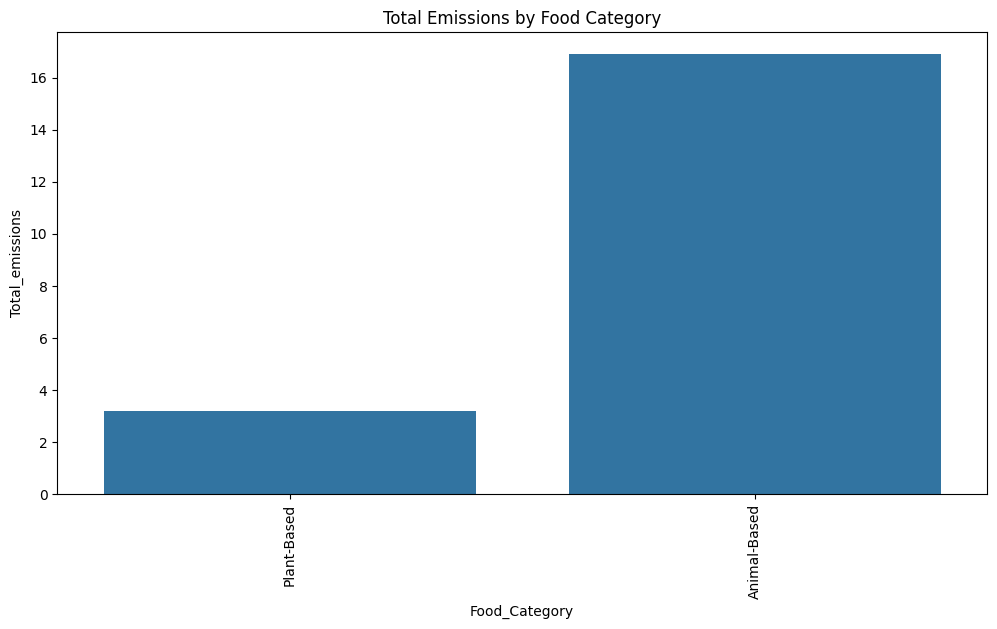

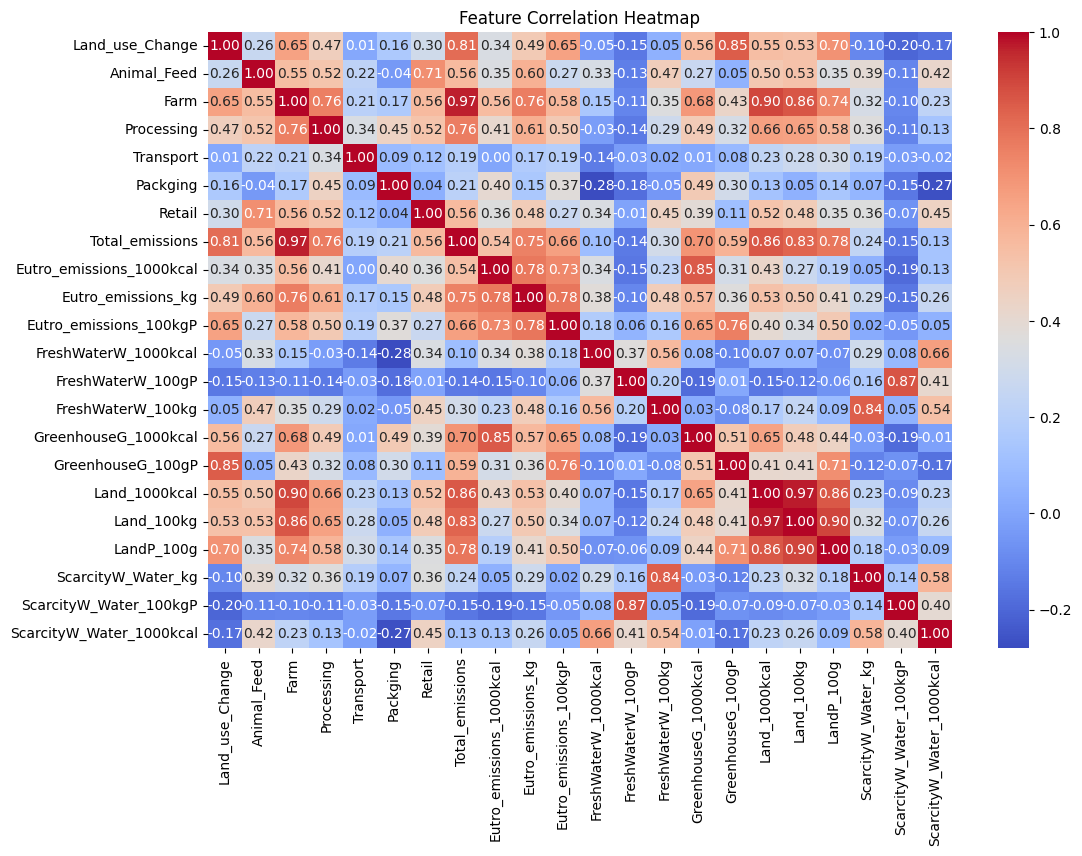

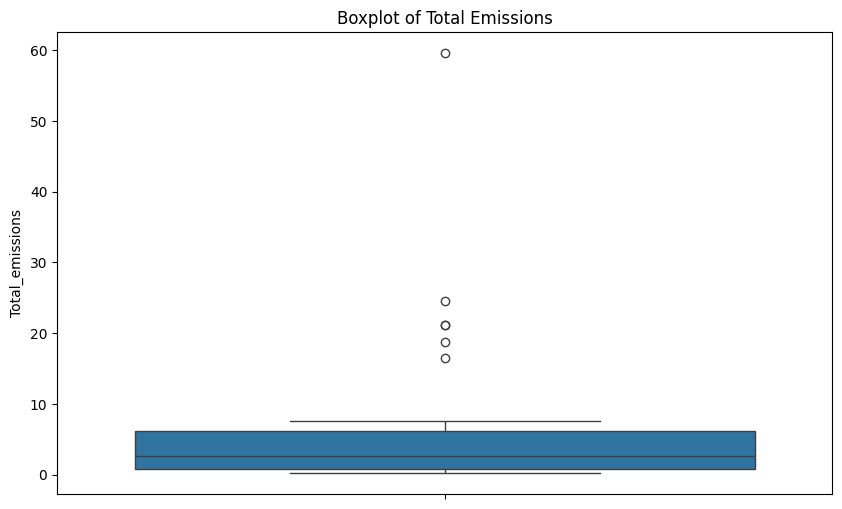

In [16]:
# Ensure numeric columns only for correlation
numeric_df = df_FPA.select_dtypes(include=['number'])

# Bar plot of total emissions per food category
plt.figure(figsize=(12, 6))
sns.barplot(data=df_FPA, x="Food_Category", y="Total_emissions", ci=None)
plt.xticks(rotation=90)
plt.title("Total Emissions by Food Category")
plt.show()

# Correlation heatmap (Fixed)
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot to check outliers in emissions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_FPA, y="Total_emissions")
plt.title("Boxplot of Total Emissions")
plt.show()

## OBSERVATION FOR UNIVARIATE, BIVARIATE & VMULTIVARIATE

C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_27964\2337641856.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_FPA, x="Food_Category", y="Total_emissions", ci=None)


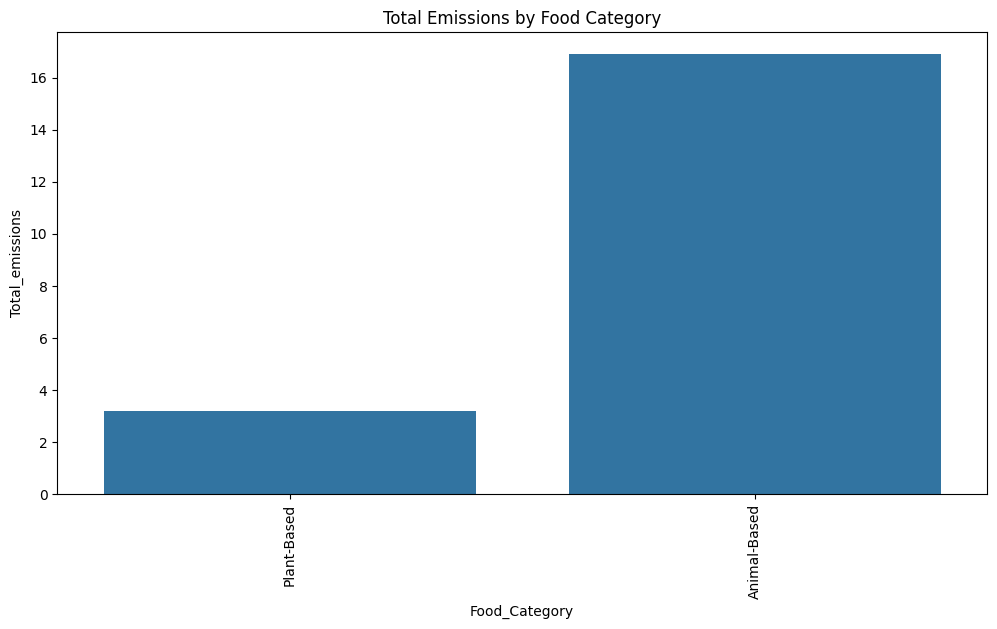

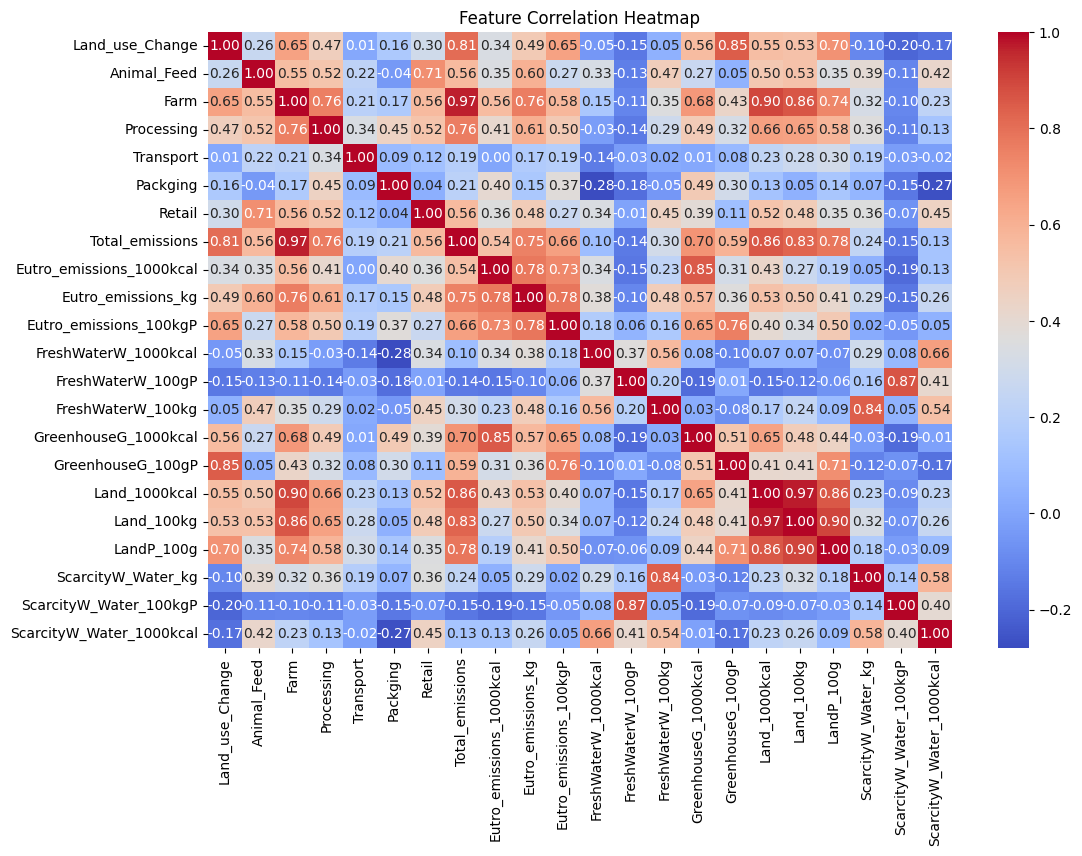

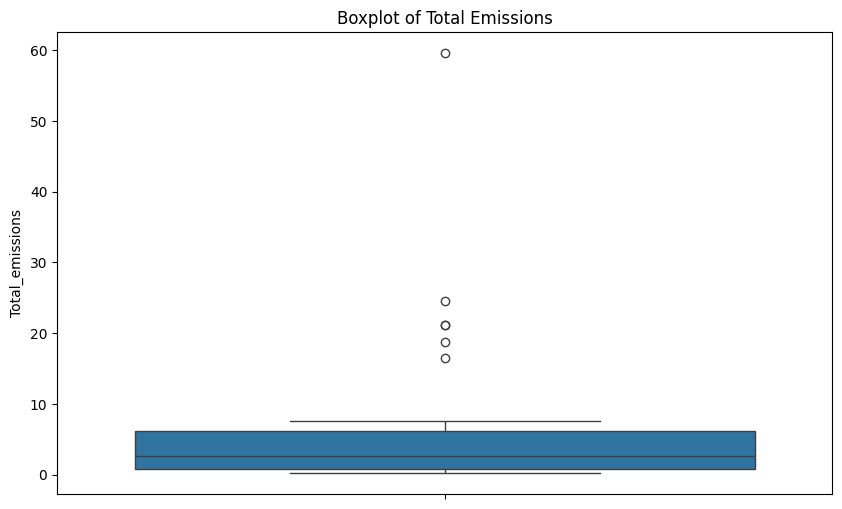

In [17]:
# Ensure numeric columns only for correlation
numeric_df = df_FPA.select_dtypes(include=['number'])

# Bar plot of total emissions per food category
plt.figure(figsize=(12, 6))
sns.barplot(data=df_FPA, x="Food_Category", y="Total_emissions", ci=None)
plt.xticks(rotation=90)
plt.title("Total Emissions by Food Category")
plt.show()

# Correlation heatmap (Fixed)
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Boxplot to check outliers in emissions
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_FPA, y="Total_emissions")
plt.title("Boxplot of Total Emissions")
plt.show()

## Hypothesis Testing

Different types of food products have significantly different environmental impacts across production stages, with animal-based foods contributing more negatively than plant-based foods.

Null Hypothesis (H₀):
There is no significant difference in environmental impact between animal-based and plant-based foods across production stages.

H₀: μ₁ = μ₂
(The mean impact of animal-based foods = the mean impact of plant-based foods)

Alternative Hypothesis (H₁):
There is a significant difference, and animal-based foods have a greater environmental impact than plant-based foods.

H₁: μ₁ > μ₂
(The mean impact of animal-based foods > the mean impact of plant-based foods)

In [ ]:

# Assuming df_FPA is already defined
df = df_FPA.copy()

# Standardize category labels
df['Food_Category'] = df['Food_Category'].str.strip().str.lower()

# Filter for relevant categories only
df_filtered = df[df['Food_Category'].isin(['animal-based', 'plant-based'])]

# Define columns for production stages 
stage_columns = ['Farm', 'Processing', 'Transport', 'Retail']

# Run t-tests to compare categories for each production stage
print("🔍 T-Test Results (Animal-based vs Plant-based Foods):\n")
for stage in stage_columns:
    animal_vals = df_filtered[df_filtered['Food_Category'] == 'animal-based'][stage].dropna()
    plant_vals = df_filtered[df_filtered['Food_Category'] == 'plant-based'][stage].dropna()
    
    t_stat, p_value = ttest_ind(animal_vals, plant_vals, equal_var=False)
    print(f"{stage}: t = {t_stat:.3f}, p = {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"✅ Significant difference in {stage} production (p < 0.05)\n")
    else:
        print(f"❌ No significant difference in {stage} production (p ≥ 0.05)\n")


🔍 T-Test Results (Animal-based vs Plant-based Foods):

Farm: t = 2.095, p = 0.0687
❌ No significant difference in Farm (p ≥ 0.05)

Processing: t = 2.143, p = 0.0569
❌ No significant difference in Processing (p ≥ 0.05)

Transport: t = 0.776, p = 0.4482
❌ No significant difference in Transport (p ≥ 0.05)

Retail: t = 4.594, p = 0.0016
✅ Significant difference in Retail (p < 0.05)



## Research Questions & Analysis

   

## 1. which food product have the lowest and highest Carbon Emissions

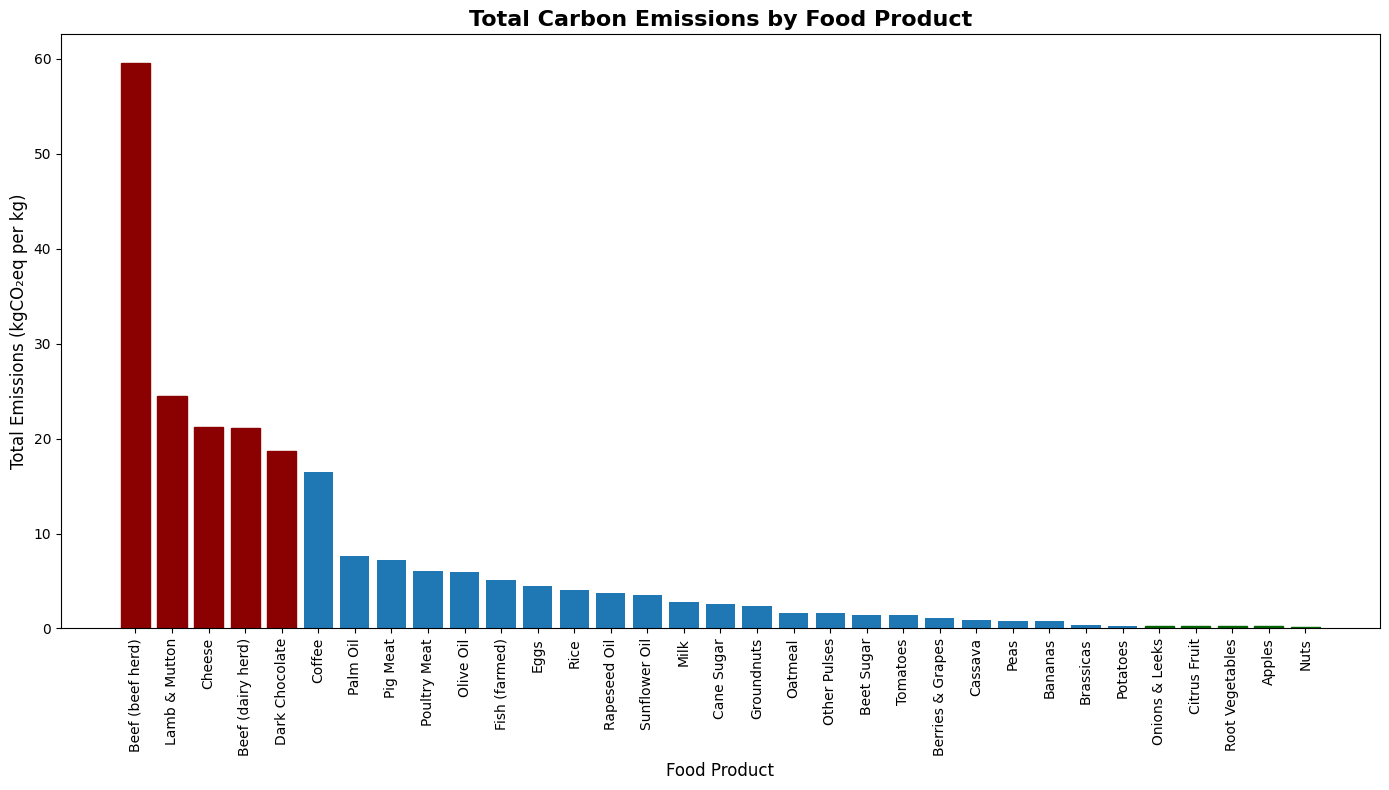

In [29]:
# Sort by Total_emissions in descending order and drop NaN values in 'Total_emissions' column
sorted_data = df_FPA.sort_values('Total_emissions', ascending=False).dropna(subset=['Total_emissions'])

# Create figure for the bar chart
plt.figure(figsize=(14, 8))

# Create a bar plot of Total emissions by Food Product
bars = plt.bar(sorted_data['Food_product'], sorted_data['Total_emissions'])

# Highlight the top 5 and bottom 5 food products
for i in range(5):
    bars[i].set_color('darkred')   # Top 5 highest emissions
    bars[-(i+1)].set_color('darkgreen')  # Bottom 5 lowest emissions

# Add labels and title
plt.xlabel('Food Product', fontsize=12)
plt.ylabel('Total Emissions (kgCO₂eq per kg)', fontsize=12)
plt.title('Total Carbon Emissions by Food Product', fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()

## 2. Animal-based vs. Plant-based: Avg GHG Emissions

C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_27964\1209368501.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Food_Category', y='GreenhouseG_1000kcal', ci=None)


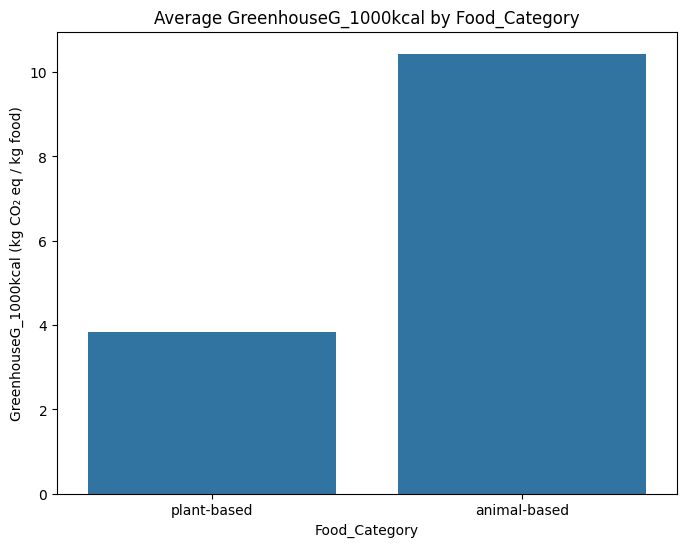

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Food_Category', y='GreenhouseG_1000kcal', ci=None)
plt.title('Average GreenhouseG_1000kcal by Food_Category')
plt.ylabel('GreenhouseG_1000kcal (kg CO₂ eq / kg food)')
plt.xlabel('Food_Category')
plt.show()


## 3. Correlation Between Land Use and CO2 Emissions

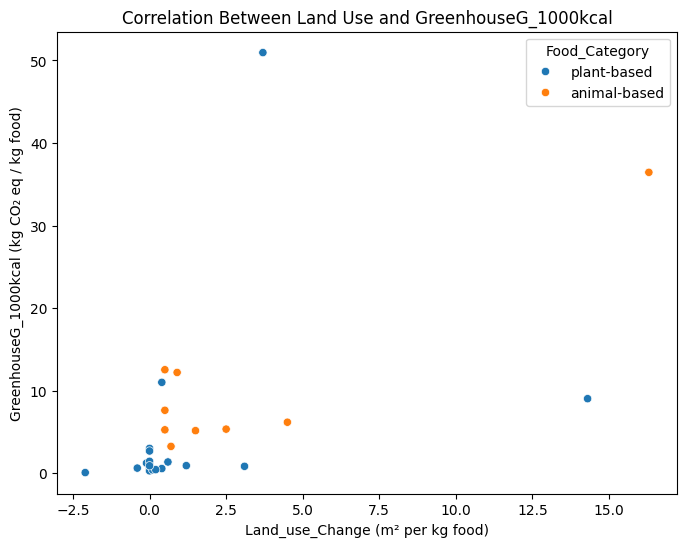

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Land_use_Change', y='GreenhouseG_1000kcal', hue='Food_Category')
plt.title('Correlation Between Land Use and GreenhouseG_1000kcal')
plt.xlabel('Land_use_Change (m² per kg food)')
plt.ylabel('GreenhouseG_1000kcal (kg CO₂ eq / kg food)')
plt.show()


## 4. Water Use Comparison: Animal vs. Plant



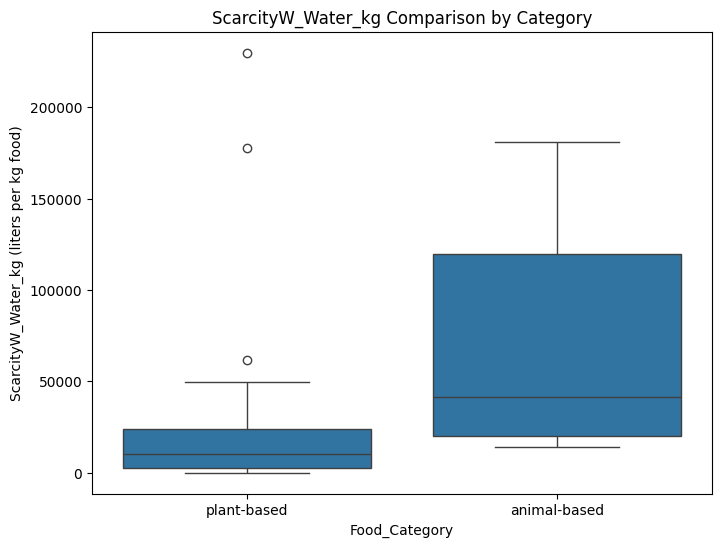

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Food_Category', y='ScarcityW_Water_kg')
plt.title('ScarcityW_Water_kg Comparison by Category')
plt.ylabel('ScarcityW_Water_kg (liters per kg food)')
plt.xlabel('Food_Category')
plt.show()


## 5. Contribution of Production Stages to Emissions

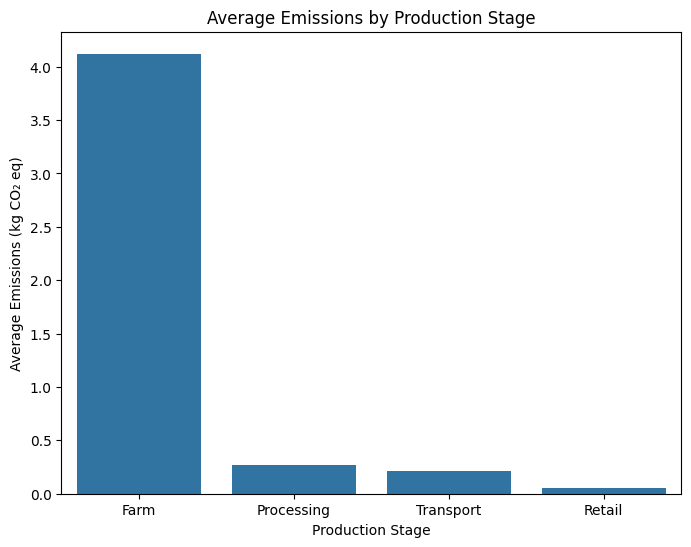

In [25]:
stage_cols = ['Farm', 'Processing', 'Transport', 'Retail']
df_stage = df[stage_cols].mean().reset_index()
df_stage.columns = ['Stage', 'Eutro_emissions_kg']

plt.figure(figsize=(8, 6))
sns.barplot(data=df_stage, x='Stage', y='Eutro_emissions_kg')
plt.title('Average Emissions by Production Stage')
plt.ylabel('Average Emissions (kg CO₂ eq)')
plt.xlabel('Production Stage')
plt.show()


6. ## Which food categories (animal-based vs plant-based) contribute the most to total carbon emissions

C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_27964\557454010.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_emissions, x="Food_Category", y="Total_emissions", palette=["#8FCB9B", "#D98A8A"])
C:\Users\wilson.asante\AppData\Local\Temp\ipykernel_27964\557454010.py:14: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\wilson.asante\Documents\github\Food-Production-Analysis\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


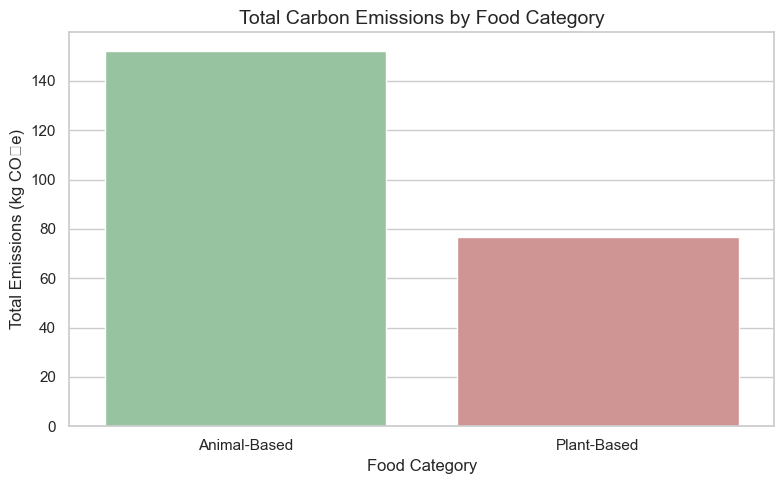

In [30]:


# Make sure your DataFrame is loaded as df_FPA
# Example: df_EFA = pd.read_csv("your_dataset.csv")

# Grouping by food category and summing total emissions
category_emissions = df_FPA.groupby("Food_Category")["Total_emissions"].sum().reset_index()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=category_emissions, x="Food_Category", y="Total_emissions", palette=["#8FCB9B", "#D98A8A"])
plt.title("Total Carbon Emissions by Food Category", fontsize=14)
plt.ylabel("Total Emissions (kg CO₂e)", fontsize=12)
plt.xlabel("Food Category", fontsize=12)
plt.tight_layout()
plt.show()
